In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("/content/Iris - Iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## to display some basic statistical details

In [5]:
setosa_df =df[df['Species'] == 'Iris-setosa']
versicolor_df = df[df['Species'] == 'Iris-versicolor']
virginica_df = df[df['Species'] == 'Iris-virginica']

In [6]:
setosa_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,25.50000,5.00600,3.418000,1.464000,0.24400
std,14.57738,0.35249,0.381024,0.173511,0.10721
min,1.00000,4.30000,2.300000,1.000000,0.10000
25%,13.25000,4.80000,3.125000,1.400000,0.20000
50%,25.50000,5.00000,3.400000,1.500000,0.20000
75%,37.75000,5.20000,3.675000,1.575000,0.30000
max,50.00000,5.80000,4.400000,1.900000,0.60000


In [7]:
versicolor_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,75.50000,5.936000,2.770000,4.260000,1.326000
std,14.57738,0.516171,0.313798,0.469911,0.197753
min,51.00000,4.900000,2.000000,3.000000,1.000000
25%,63.25000,5.600000,2.525000,4.000000,1.200000
50%,75.50000,5.900000,2.800000,4.350000,1.300000
75%,87.75000,6.300000,3.000000,4.600000,1.500000
max,100.00000,7.000000,3.400000,5.100000,1.800000


In [8]:
virginica_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,125.50000,6.58800,2.974000,5.552000,2.02600
std,14.57738,0.63588,0.322497,0.551895,0.27465
min,101.00000,4.90000,2.200000,4.500000,1.40000
25%,113.25000,6.22500,2.800000,5.100000,1.80000
50%,125.50000,6.50000,3.000000,5.550000,2.00000
75%,137.75000,6.90000,3.175000,5.875000,2.30000
max,150.00000,7.90000,3.800000,6.900000,2.50000


## Calculate the measures of variability.

In [18]:
def variance(data):
  n=len(data)
  mean=sum(data)/n
  var=sum((i-mean)**2 for i in data)/(n-1)
  return var

import math
def std(data):
  var=variance(data)
  std=math.sqrt(var)
  return std

In [11]:
variance_setosa = variance(setosa_df['PetalLengthCm'])
variance_versicolor = variance(versicolor_df['PetalLengthCm'])
variance_virginica = variance(virginica_df['PetalLengthCm'])

In [17]:
print("Variance for Iris-setosa:", variance_setosa)
print("Variance for Iris-versicolor:", variance_versicolor)
print("Variance for Iris-virginica:", variance_virginica)

Variance for Iris-setosa: 0.030106122448979603
Variance for Iris-versicolor: 0.22081632653061237
Variance for Iris-virginica: 0.304587755102041


In [19]:
std_setosa = std(setosa_df['PetalLengthCm'])
std_versicolor =std(versicolor_df['PetalLengthCm'])
std_virginica = std(virginica_df['PetalLengthCm'])

In [20]:
print("STD for Iris-setosa:", std_setosa)
print("STD for Iris-versicolor:", std_versicolor)
print("STD for Iris-virginica:", std_virginica)

STD for Iris-setosa: 0.1735111594364455
STD for Iris-versicolor: 0.46991097723995806
STD for Iris-virginica: 0.5518946956639835


# Calculate and provide the visualization of the Correlation among the variables.

In [21]:
def correlation(x,y):
  mean_x=sum(x)/float(len(x))
  mean_y=sum(y)/float(len(y))

  sub_x=[i-mean_x for i in x]
  sub_y=[i-mean_y for i in y]

  numerater=sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])

  std_x=sum([sub_x[i]**2.0 for i in range(len(sub_x))])
  std_y=sum([sub_y[i]**2.0 for i in range(len(sub_y))])

  deno=math.sqrt((std_x* std_y))
  cor=numerater/deno
  return cor

In [30]:
cormat = df.corr(numeric_only=True)

<Axes: >

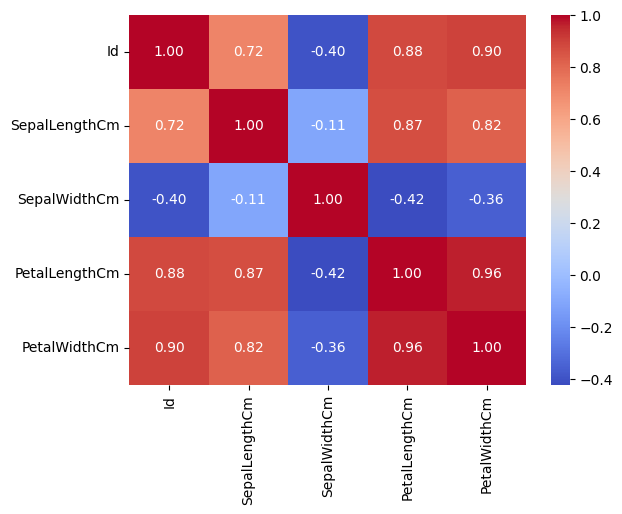

In [31]:
import seaborn as sns
sns.heatmap(cormat, annot=True, cmap='coolwarm', fmt=".2f")